In [1]:
import numpy as np
import pandas as pd
import sklearn 
import glob
import math
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
# the class is responsible for reading the csv. file (Poland) 

class Data_Reader_Poland():
    
    def __init__(self, path_to_file):
        self.path_to_file = path_to_file
        self.data = ''
        self.delta = ''
        self.read_data()
        self.set_date_index()
        self.get_delta_deaths()
    
    def read_data(self):
        self.data = pd.read_csv(self.path_to_file)
        
    def set_date_index(self):
        self.data.set_index('Timestamp')
        
    def plot_deaths(self):
        plt.figure(figsize=(12,6))
        plt.title('Deaths')
        plt.plot(self.data['Deaths'])
        plt.xlabel('Date', fontsize=18)
        plt.ylabel('Deaths', fontsize=18)
        plt.show()
        
    def get_delta_deaths(self):
        tmp = self.data.filter(['Deaths'])
        deaths_by_day = []
        delta_by_day = []
        for i in range(len(tmp)):
           deaths_by_day.append(tmp.values[i][0])
        for i in range(len(tmp) - 1):
           delta_by_day.append(deaths_by_day[i+1] - deaths_by_day[i])
        self.delta = np.array(delta_by_day).reshape(-1, 1)
        
    def plot_delta_deaths(self):
        plt.figure(figsize=(12,6))
        plt.title('Deaths in Poland')
        plt.plot(self.delta)
        plt.xlabel('Date', fontsize=18)
        plt.ylabel('Deaths', fontsize=18)
        plt.show()

In [3]:
# the class is responsible for reading the csv. file (Voevodeships) 

class Data_Reader:
    
    def __init__(self, path_to_file):
        self.data = ''
        self.delta = ''
        self.clean_data()
        
        self.path_to_file = path_to_file
        
        self.read_data()
        self.transform_data()
        self.separate_data()
        self.transforrm_to_delta_voivodeships()
        self.concatenate_data()
    
    def read_data(self):
        self.data = pd.DataFrame()
        #for loop that allows for read all csv files from directory, and glue this data
        for file_name in glob.glob(f"{self.path_to_file}/*.csv"):
            tmp = pd.read_csv(file_name, low_memory=False)
            self.data = pd.concat([self.data, tmp],axis=0)

    def transform_data(self):
        self.data = self.data.drop(columns="County/City") #drop unnecessary column
        self.data["Last Update"] = self.data["Last Update"].str.replace("( ).*","") #Delete "time" from Last Update
        self.data = self.data.rename({"Last Update": "Date"}, axis=1) #change the column "Last Update" for "Date"

    def separate_data(self):
        self.dolnoslaskie = self.data[self.data["Voivodeship"] == "dolnośląskie"]
        self.kujawsko_pomorskie = self.data[self.data["Voivodeship"] == "kujawsko-pomorskie"]
        self.lubelskie = self.data[self.data["Voivodeship"] == "lubelskie"]
        self.lubuskie = self.data[self.data["Voivodeship"] == "lubuskie"]
        self.lodzkie = self.data[self.data["Voivodeship"] == "łódzkie"]
        self.malopolskie = self.data[self.data["Voivodeship"] == "małopolskie"]
        self.mazowieckie = self.data[self.data["Voivodeship"] == "mazowieckie"]
        self.opolskie = self.data[self.data["Voivodeship"] == "opolskie"]
        self.podkarpackie = self.data[self.data["Voivodeship"] == "podkarpackie"]
        self.podlaskie = self.data[self.data["Voivodeship"] == "podlaskie"]
        self.pomorskie = self.data[self.data["Voivodeship"] == "pomorskie"]
        self.slaskie = self.data[self.data["Voivodeship"] == "śląskie"]
        self.swietokrzyskie = self.data[self.data["Voivodeship"] == "świętokrzyskie"]
        self.warminsko_mazurskie = self.data[self.data["Voivodeship"] == "warmińsko-mazurskie"]
        self.wielkopolskie = self.data[self.data["Voivodeship"] == "wielkopolskie"]
        self.zachodniopomorskie = self.data[self.data["Voivodeship"] == "zachodniopomorskie"]
        
    def clean_data(self):
        self.dolnoslaskie = ''
        self.kujawsko_pomorskie = ''
        self.lubelskie = ''
        self.lubuskie = ''
        self.lodzkie = ''
        self.malopolskie = ''
        self.mazowieckie = ''
        self.opolskie = ''
        self.podkarpackie = ''
        self.podlaskie = ''
        self.pomorskie = ''
        self.slaskie = ''
        self.swietokrzyskie = ''
        self.warminsko_mazurskie = ''
        self.wielkopolskie = ''
        self.zachodniopomorskie = ''
    
    def voivodeships_delta(self, dataframe):
        tmp = dataframe['Deaths'].values
        return np.subtract(tmp[1:], tmp[:-1])

    def create_delta_dataframe(self, data):
        return pd.DataFrame(self.voivodeships_delta(data), columns = ['Deaths'])
    
    def transforrm_to_delta_voivodeships(self):
        self.dolnoslaskie = self.create_delta_dataframe(self.dolnoslaskie)
        self.kujawsko_pomorskie = self.create_delta_dataframe(self.kujawsko_pomorskie)
        self.lubelskie = self.create_delta_dataframe(self.lubelskie)
        self.lubuskie = self.create_delta_dataframe(self.lubuskie)
        self.lodzkie = self.create_delta_dataframe(self.lodzkie)
        self.malopolskie = self.create_delta_dataframe(self.malopolskie)
        self.mazowieckie = self.create_delta_dataframe(self.mazowieckie)
        self.opolskie = self.create_delta_dataframe(self.opolskie)
        self.podkarpackie = self.create_delta_dataframe(self.podkarpackie)
        self.podlaskie = self.create_delta_dataframe(self.podlaskie)
        self.pomorskie = self.create_delta_dataframe(self.pomorskie)
        self.slaskie = self.create_delta_dataframe(self.slaskie)
        self.swietokrzyskie = self.create_delta_dataframe(self.swietokrzyskie)
        self.warminsko_mazurskie = self.create_delta_dataframe(self.warminsko_mazurskie)
        self.wielkopolskie = self.create_delta_dataframe(self.wielkopolskie)
        self.zachodniopomorskie = self.create_delta_dataframe(self.zachodniopomorskie)
    
    def plot_voivodeships(self):
        figure, axes = plt.subplots(nrows=4, ncols=4, figsize=(14,14))
        plt.grid()
        voivodeships = [[dolnoslaskie, kujawsko_pomorskie, lubelskie, lubuskie],
                       [lodzkie, malopolskie, mazowieckie, opolskie],
                       [podkarpackie, podlaskie, pomorskie, slaskie],
                       [swietokrzyskie, warminsko_mazurskie, wielkopolskie, zachodniopomorskie]]
        
        for i in range(4):
            for j in range(4):
                axes[i, j].plot(voivodeships[i][j], c=np.random.rand(3,))
        
        title = [['dolnoslaskie', 'kujawsko_pomorskie', 'lubelskie', 'lubuskie'], 
         ['lodzkie', 'malopolskie', 'mazowieckie', 'opolskie'],
         ['podkarpackie', 'podlaskie', 'pomorskie', 'slaskie'],
         ['swietokrzyskie', 'warminsko_mazurskie', 'wielkopolskie', 'zachodniopomorskie']]
        for i in range(4):
            for j in range(4):
                axes[i, j].set_title(title[i][j])
                axes[i, j].set_xlabel('days')
                axes[i, j].set_ylabel('deaths')
                axes[i, j].grid()
        
        figure.tight_layout()
    
    def concatenate_data(self):
        # All Poland delta
        voivodeships = [self.kujawsko_pomorskie, self.lubelskie, self.lubuskie,
                       self.lodzkie, self.malopolskie, self.mazowieckie, self.opolskie,
                       self.podkarpackie, self.podlaskie, self.pomorskie, self.slaskie,
                       self.swietokrzyskie, self.warminsko_mazurskie, self.wielkopolskie, self.zachodniopomorskie]
        self.delta = self.dolnoslaskie 
        
        for i in voivodeships:
            self.delta = self.delta + i
        
        list_ = []

        for a in self.delta['Deaths']:
            list_.append(a)

        self.delta = np.array(list_).reshape(-1, 1)
        
    def plot_data(self):
        plt.figure(figsize=(12,6))
        plt.title('Deaths by voivodeships')
        plt.plot(self.delta)
        plt.xlabel('Date', fontsize=18)
        plt.ylabel('Deaths', fontsize=18)
        plt.show()
        

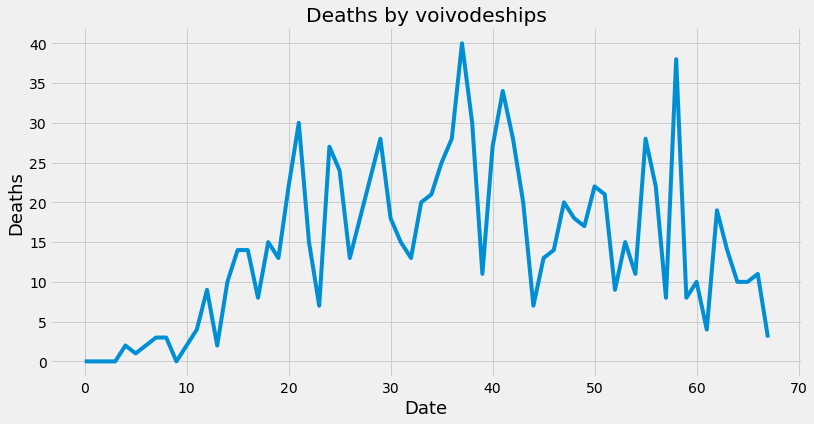

In [4]:
data_voev = Data_Reader('covid19_data')
data_voev.plot_data()

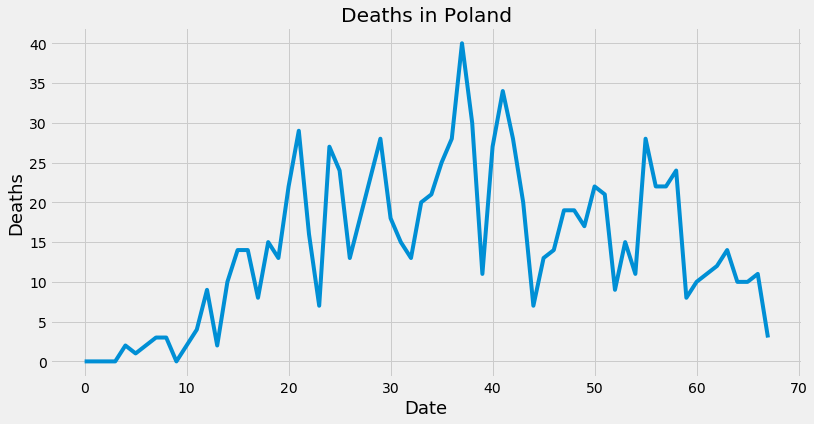

In [5]:
data = Data_Reader_Poland('covid19_poland/covid19_poland.csv')
data.plot_delta_deaths()

In [6]:
deaths = pd.DataFrame(data.delta,columns = ['Deaths'])
deaths_voivodeships = pd.DataFrame(data_voev.delta,columns = ['Deaths'])

In [7]:
# the class is responsible for the data preparation for Linear Regression and Decision Tree model 

class RegressionDataPreparation:
    
    def __init__(self, data):
        self.data = data
        self.X = ''
        self.y = ''
        self.x_train = ''
        self.x_test = ''
        self.y_train = ''
        self.y_test = ''
        self.x_future = ''
        self.future_days = 32
        
        self.create_target_data()
        self.create_X_features()
        self.create_y_target()
        self.data_split()
        self.get_future_x()
        
    # create a variable to predict 'x' days out into the future
    def create_target_data(self):
        self.data['Prediction'] = self.data[['Deaths']].shift(-self.future_days)
        
    # create the feature data set X and convert it to a numpy array and remove
    # the last'x rows/days
    def create_X_features(self):
        self.X  = np.array(self.data.drop(['Prediction'], 1))[:-self.future_days]
          
    # create the target data set (y) and convert it to a numpy array
    # and get the all of the target values except the last 'x' rows
    def create_y_target(self):
        self.y = np.array(self.data['Prediction'])[:-self.future_days]
        
    # split the data into 75% training and 25% testing
    def data_split(self):
        self.x_train, self.x_test, self.y_train, self.y_test = train_test_split(self.X, self.y, test_size = 0.25)
        
    # create forecast array
    def get_future_x(self):
        self.x_future = np.array(self.data.drop(['Prediction'], 1)[:-self.future_days].tail(self.future_days))      

In [8]:
# the class is responsible for Linear Regression and Decision Tree model creations with additional features

class RegressionMethod:
    
    def __init__(self, data):
        self.data =  data
        self.tree = ''
        self.lr = ''
        self.tree_prediction = ''
        self.lr_prediction = ''
        self.tree_forecasting = ''
        self.lr_forecasting = ''
        
        self.create_decision_tree()
        self.create_linear_regression()
        self.get_decision_tree_prediction()
        self.get_linear_regression_prediction()
        self.get_decision_tree_forecasting()
        self.get_lr_forecasting()
        
    # create the decision tree regressor model    
    def create_decision_tree(self):
        self.tree = DecisionTreeRegressor().fit(data.x_train, data.y_train)
        
    # create the linear regression model
    def create_linear_regression(self):
        self.lr = LinearRegression().fit(data.x_train, data.y_train)
        
    def get_decision_tree_prediction(self):
        self.tree_prediction = self.tree.predict(data.x_future)
    
    def get_linear_regression_prediction(self):
        self.lr_prediction = self.lr.predict(data.x_future)
        
    def get_decision_tree_forecasting(self):
        self.tree_forecasting = self.tree.predict(self.data.y_train.reshape(-1, 1))

    def get_lr_forecasting(self):
        self.lr_forecasting = self.lr.predict(self.data.y_train.reshape(-1, 1))
    
    # Simple error
    def _error(self, a, b):
        return a - b
    
    # Mean Squared Error
    def mse(self, method):
        mse = 0
        if method == 'tree':
            mse = np.mean(np.square(self._error(self.data.y_test, self.tree_prediction[-9:])))
        elif method == 'lr':
            mse = np.mean(np.square(self._error(self.data.y_test, self.lr_prediction[-9:])))
        return mse

    # Root Mean Squared Error    
    def rmse(self, method):
        return np.sqrt(self.mse(method))
    
    # Normalized Root Mean Squared Error
    def nrmse(self, method):
        denominator = self.data.y_test.max() - self.data.y_test.min()
        return self.rmse(method)/denominator
    
    # Mean Error
    def me(self, method):
        me = 0
        if method == 'tree':
            me = np.mean(self._error(self.data.y_test, self.tree_prediction[-9:]))
        elif method == 'lr':
            me = np.mean(self._error(self.data.y_test, self.lr_prediction[-9:]))
        return me
    
    # Mean Absolute Error
    def mae(self, method):
        mae = 0
        if method == 'tree':
            mae = np.mean(np.abs(self._error(self.data.y_test, self.tree_prediction[-9:])))
        elif method == 'lr':
            mae = np.mean(np.abs(self._error(self.data.y_test, self.lr_prediction[-9:])))
        return mae
      
    def plot_predictions(self, predictor):
        valid = data.data[data.X.shape[0]:]
        plt.figure(figsize=(16, 8))
        if predictor == 'tree':
            valid['Predictions'] = self.tree_prediction
            plt.title('Decision Tree Regressor')
        elif predictor == 'lr':
            valid['Predictions'] = self.lr_prediction
            plt.title('Linear regression')
        plt.xlabel('Days')
        plt.ylabel('Deaths')
        plt.plot(self.get_data_from_dataframe())
        plt.plot(valid[['Deaths', 'Predictions']])
        plt.legend(['Origin', 'Validation', 'Prediction'])
        plt.show()
        
    def plot_forecasting(self, predictor):
        valid = data.data[data.X.shape[0]:]
        plt.figure(figsize=(16, 8))
        plt.xlabel('Days')
        plt.ylabel('Deaths')
        
        
        if predictor == 'tree':
            valid['Predictions'] = self.tree_prediction
            plt.title('Decision Tree Regressor')
            plt.plot(self.get_x_axis(), self.tree_forecasting, color='green', linestyle='dashed',
                 linewidth=1, marker='H',markerfacecolor='blue', markersize=4)
            plt.legend(['Decision Tree Forecast', 'Origin', 'Validation', 'Prediction'])
        elif predictor == 'lr':
            valid['Predictions'] = self.lr_prediction
            plt.title('Linear Regression')
            plt.plot(self.get_x_axis(), self.lr_forecasting, color='green', linestyle='dashed',
                 linewidth=1, marker='H',markerfacecolor='blue', markersize=4)
            plt.legend(['Linear Regression', 'Origin', 'Validation', 'Prediction'])
        plt.plot(deaths['Deaths'])
        plt.plot(valid[['Deaths', 'Predictions']])
        plt.show()
        
    def get_data_from_dataframe(self):
        return [i for i in self.data.data['Deaths']]
    
    def get_x_axis(self):
        tmp = []
        for i in range(27):
            tmp.append(i + 68)
        return tmp
        
    

# Decision Tree and Linear Regression Predictions

C:\Users\shyrokoa\CONDA3\envs\covid19\lib\site-packages\ipykernel_launcher.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


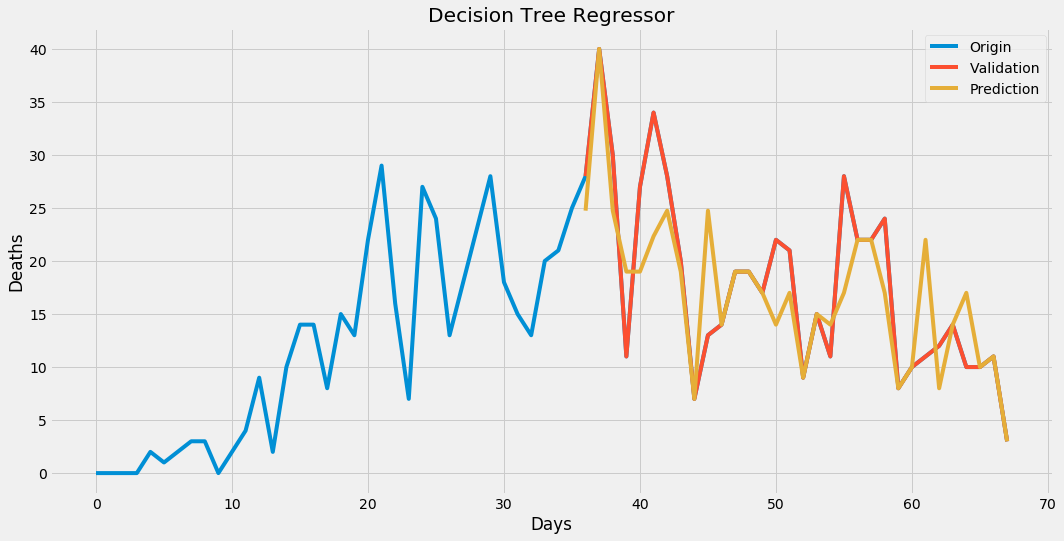

C:\Users\shyrokoa\CONDA3\envs\covid19\lib\site-packages\ipykernel_launcher.py:86: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


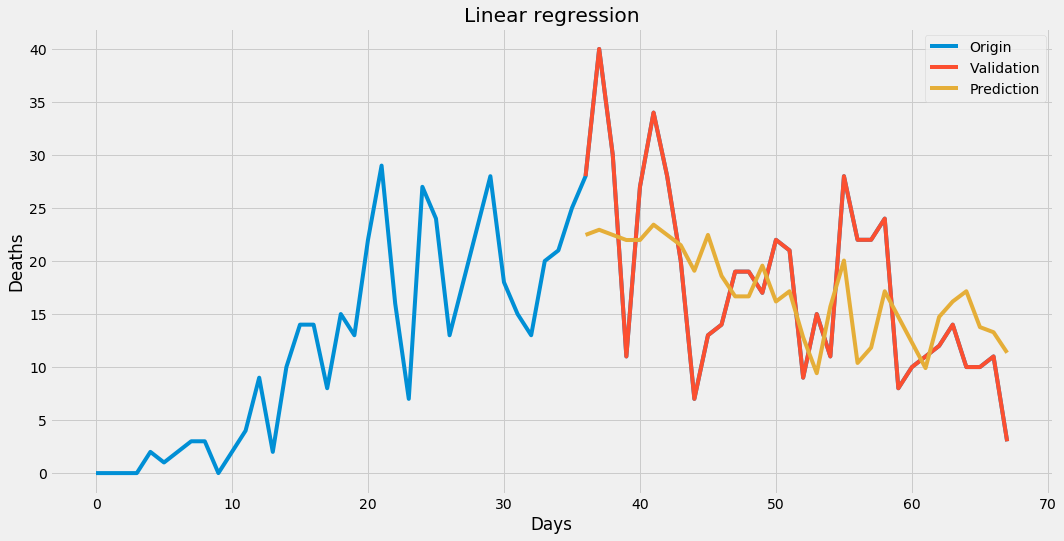

In [9]:
data = RegressionDataPreparation(deaths)
model = RegressionMethod(data)
model.plot_predictions('tree')
model.plot_predictions('lr')

# Decision Tree and Linear Regression Forecasting

C:\Users\shyrokoa\CONDA3\envs\covid19\lib\site-packages\ipykernel_launcher.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


[19. 22. 17. 14. 17. 14. 14. 19. 17.  8. 22. 14. 17. 22. 22.  8. 15. 14.
 15. 10.  9.  9.  8. 14. 19. 15.  7.]


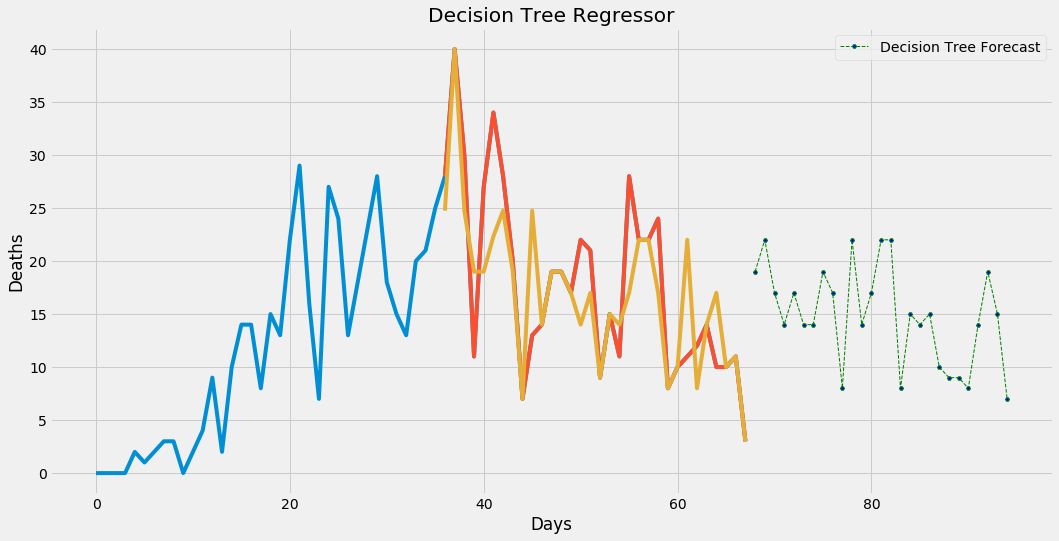

In [14]:
model.plot_forecasting('tree')

In [11]:
# Poland error using 2 methods
print(f'Tree MSE: {model.mse("tree")}')
print(f'Lr MSE: {model.mse("lr")}')
print(f'Tree RMSE: {model.rmse("tree")}')
print(f'Lr RMSE: {model.rmse("lr")}')
print(f'Tree NRMSE: {model.nrmse("tree")}')
print(f'Lr NRMSE: {model.nrmse("lr")}')
print(f'Tree ME: {model.me("tree")}')
print(f'Lr ME: {model.me("lr")}')
print(f'Tree MAE: {model.mae("tree")}')
print(f'Lr MAE: {model.mae("lr")}')



Tree MSE: 116.44444444444444
Lr MSE: 71.2700357407083
Tree RMSE: 10.790942704159097
Lr RMSE: 8.442158239497072
Tree NRMSE: 0.6347613355387703
Lr NRMSE: 0.49659754349982776
Tree ME: 7.555555555555555
Lr ME: 5.285986178223819
Tree MAE: 9.333333333333334
Lr MAE: 7.482182436432219


C:\Users\shyrokoa\CONDA3\envs\covid19\lib\site-packages\ipykernel_launcher.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


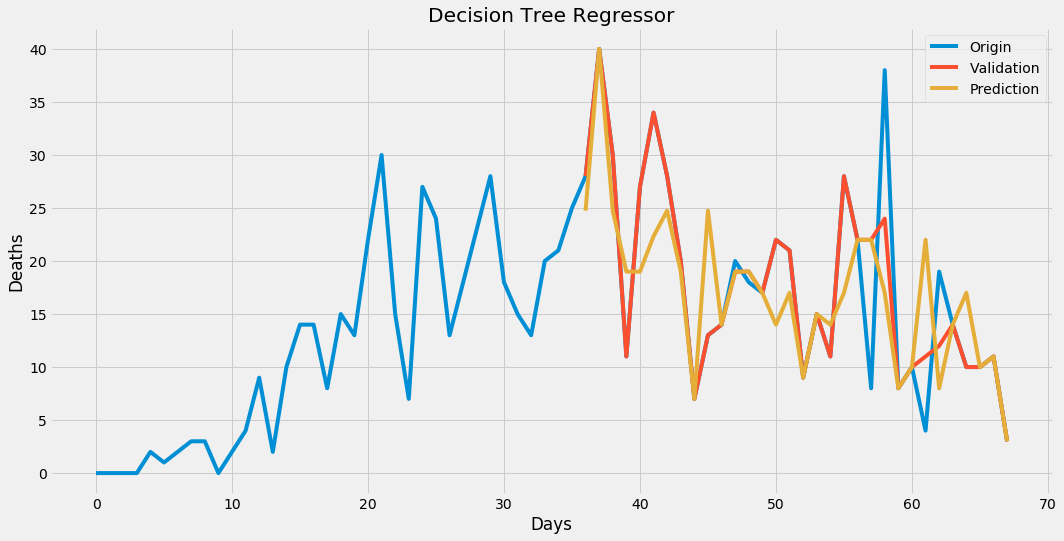

C:\Users\shyrokoa\CONDA3\envs\covid19\lib\site-packages\ipykernel_launcher.py:86: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


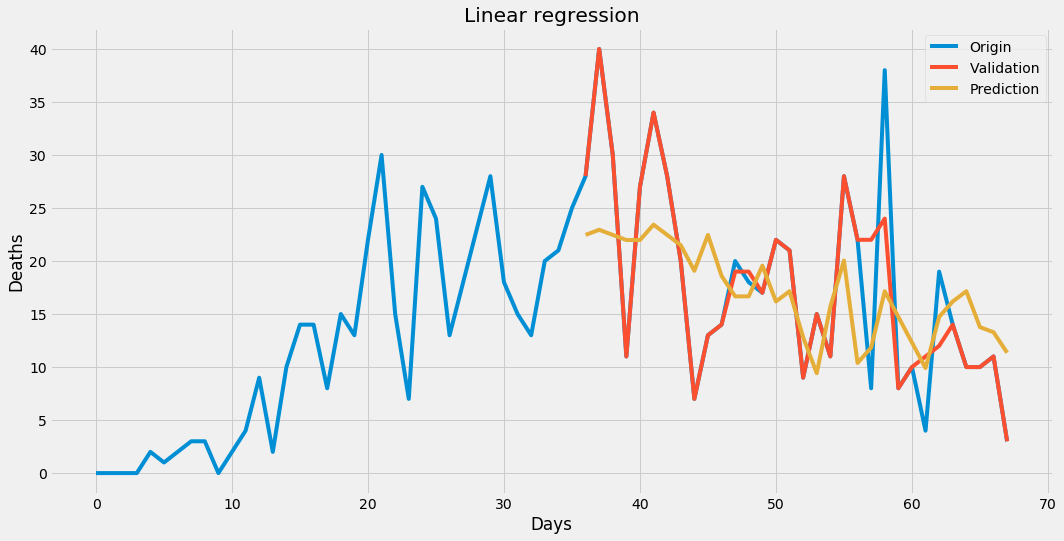

In [12]:
voev = RegressionDataPreparation(deaths_voivodeships)
model_voev = RegressionMethod(voev)
model_voev.plot_predictions('tree')
model_voev.plot_predictions('lr')

# Errors

In [13]:
# Voevodeships error using 2 methods
print(f'Tree MSE: {model_voev.mse("tree")}')
print(f'Lr MSE: {model_voev.mse("lr")}')
print(f'Tree RMSE: {model_voev.rmse("tree")}')
print(f'Lr RMSE: {model_voev.rmse("lr")}')
print(f'Tree NRMSE: {model_voev.nrmse("tree")}')
print(f'Lr NRMSE: {model_voev.nrmse("lr")}')
print(f'Tree ME: {model_voev.me("tree")}')
print(f'Lr ME: {model_voev.me("lr")}')
print(f'Tree MAE: {model_voev.mae("tree")}')
print(f'Lr MAE: {model_voev.mae("lr")}')

Tree MSE: 111.44444444444444
Lr MSE: 105.73121362035974
Tree RMSE: 10.556725081408743
Lr RMSE: 10.282568434995206
Tree NRMSE: 0.3518908360469581
Lr NRMSE: 0.34275228116650686
Tree ME: 7.0
Lr ME: 4.730430622668264
Tree MAE: 7.444444444444445
Lr MAE: 7.09722394306089
